In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import RegularGridInterpolator
import random
import pandas as pd
import Merger_rate_plot as mr
import interpolate as inter

In [3]:
plt.style.use(['science']) 
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [4]:
Nruns = 100
Outcome_data_file_name = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"
Triple_df = pd.read_csv(Outcome_data_file_name)
df_run = []

In [5]:
Ntriple = int(len(Triple_df["M1"])/Nruns)

In [6]:
for i in range(Ntriple):
    df_i = Triple_df[Ntriple*i:Ntriple*(i+1)]
    df_run.append(df_i)
    

In [7]:
def merger_rate_per_run(df,zmax=4,zbinsize=0.01,lgzbinsize=0.2,lgzmin=-3.0,lgzmax=1.0):

    
    Tr_prompt = df[(df["merger_flag"]=="Tr-12") | (df["merger_flag"]=="Tr-13") | (df["merger_flag"]=="Tr-23")]["z_triple"]
    Tr_prompt_mr,Tr_prompt_lgzbins,Tr_prompt_rate = mr.merger_rate_log_plot(Tr_prompt,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)


    Tr_ej_z = df[(df["merger_flag"]=="Tr-ej")]["z_triple"]
    Tr_ej_mr,Tr_ej_lgzbins,Tr_ej_rate = mr.merger_rate_log_plot(Tr_ej_z,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax) 

    return Tr_prompt_lgzbins,[Tr_prompt_mr,Tr_prompt_rate,Tr_ej_mr,Tr_ej_rate]

In [8]:
merger_rate_per_run(df_run[0])

(array([-2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9,
        -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9]),
 [0.00534721097079488,
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.73540527e-06, 0.00000000e+00, 0.00000000e+00,
         6.10040055e-06, 5.18775143e-05, 5.75644326e-05, 1.99239497e-04,
         3.00789393e-04, 9.90376226e-04, 1.96737221e-03, 2.56779012e-03,
         2.82610903e-03, 4.13183399e-04, 0.00000000e+00, 0.00000000e+00]),
  0.005021170049846697,
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 3.51906043e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.84708246e-05, 3.23727102e-05, 1.22861551e-04,
         3.00559196e-04, 1.13094071e-03, 1.83795843e-03, 2.94982572e-03,
         1.44902720e-03, 8.25798095e-04, 0.00000000e+00, 0.00000000e+00])])

In [9]:
net_mr_Tr = []
net_mr_Tr_ej = []

mr_Tr = []
mr_Tr_ej = []

for i in range(Nruns):
    mr_out = merger_rate_per_run(df_run[i],4,0.01,0.25,-3.0,1.0)[1:][0]
    net_mr_Tr.append(mr_out[0])
    mr_Tr.append(mr_out[1])
    net_mr_Tr_ej.append(mr_out[2])
    mr_Tr_ej.append(mr_out[3])


mr_Tr  = np.array(mr_Tr)
mr_Tr_ej = np.array(mr_Tr_ej)

In [10]:
lgzbins = merger_rate_per_run(df_run[i],4,0.01,0.25,-3.0,1.0)[0]

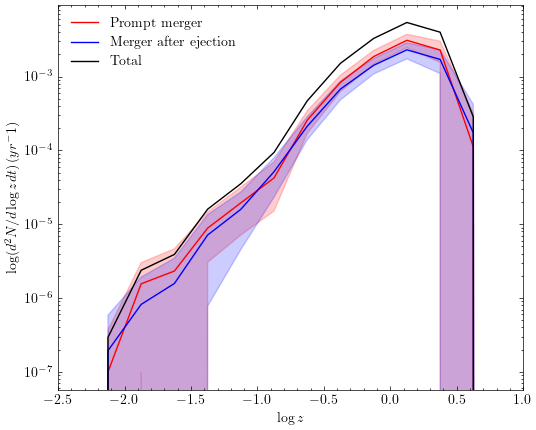

In [11]:
plt.figure(figsize=(6,5))

plt.plot(lgzbins,np.mean(mr_Tr,axis=0),color="red",label="Prompt merger")
plt.fill_between(lgzbins,np.mean(mr_Tr,axis=0)-np.std(mr_Tr,axis=0),np.mean(mr_Tr,axis=0)+np.std(mr_Tr,axis=0),color="red",alpha=0.2)

plt.plot(lgzbins,np.mean(mr_Tr_ej,axis=0),color="blue",label="Merger after ejection")
plt.fill_between(lgzbins,np.mean(mr_Tr_ej,axis=0)-np.std(mr_Tr_ej,axis=0),np.mean(mr_Tr_ej,axis=0)+np.std(mr_Tr_ej,axis=0),color="blue",alpha=0.2)

plt.plot(lgzbins,np.mean(mr_Tr,axis=0)+np.mean(mr_Tr_ej,axis=0),color="black",label="Total")

plt.xlim(-2.5,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt) \, (yr^-1)$")
plt.legend()
plt.yscale("log")

In [12]:
binary_data_file =  "/Users/pranavsatheesh/Triples/Github/Illustris_Data/iso_binaries_data_from_ill.csv"

In [13]:
df_binary = pd.read_csv(binary_data_file,index_col= False)
df_binary.head()

,M1,M2,qin,t_merger,z_merger,merger_flag
0,2.260508e+06,1.628522e+06,0.720423,8.585867e+08,6.460270,Yes
1,1.614294e+06,1.077030e+06,0.667183,8.924214e+08,6.270490,Yes
2,6.552913e+06,1.175374e+06,0.179367,3.833599e+09,1.720798,Yes
3,7.037528e+06,6.261750e+06,0.889766,1.653894e+11,0.000000,No
4,1.178789e+07,3.305567e+06,0.280421,1.484220e+10,0.000000,No


In [14]:
binary_merger_z = df_binary[df_binary["merger_flag"] == "Yes"]["z_merger"]

binary_mr,lgzbins_bin,dNdlogzdt_bin = mr.merger_rate_log_plot(binary_merger_z,zmax=4,zbinsize=0.01,lgzbinsize=0.15,lgzmin=-3.0,lgzmax=1.0)

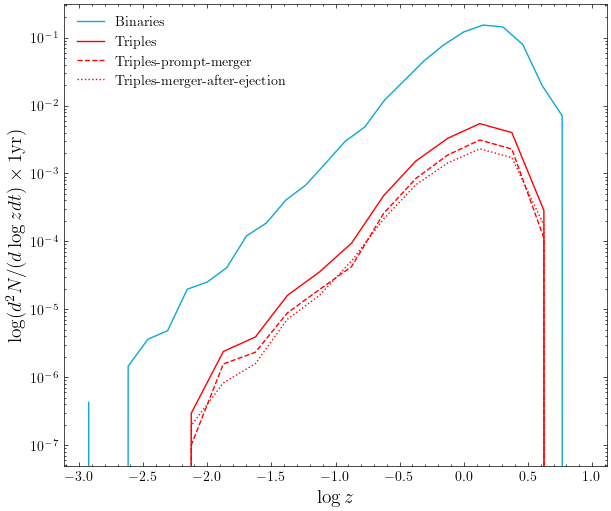

In [23]:
plt.figure(figsize=(7,6))
plt.plot(lgzbins_bin,dNdlogzdt_bin,color="#0ba9d3",label="Binaries")
plt.plot(lgzbins,np.mean(mr_Tr+mr_Tr_ej,axis=0),color="red",label="Triples")
plt.plot(lgzbins,np.mean(mr_Tr,axis=0),color="red",linestyle="--",label="Triples-prompt-merger")
plt.plot(lgzbins,np.mean(mr_Tr_ej,axis=0),color="red",linestyle=":",label="Triples-merger-after-ejection")
plt.yscale("log")
plt.xlabel("$\log z$",fontsize=14)
plt.ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=14)
plt.legend(fontsize=10)
plt.savefig("Figures/Merger_rates_binary_vs_triple.pdf")